# Problem Statament :
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.The company markets its courses on several websites and search engines like Google.Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.Moreover, the company also gets leads through past referrals.Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.Now, although X Education gets a lot of leads, its lead conversion rate is very poor.


X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
  

# Goals of the Case Study

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hotLead whereas a lower score would mean coldlead.

- There are some more problems presented by the company which model should be able to adjust to if the company's requirement changes in the future.





In [4]:
#Importing necessary Liabraries :
import pandas as pd , numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignoring the warnning:
import warnings
warnings.filterwarnings("ignore")



In [63]:
# Reading & understanding dataset :
lead_df = pd.read_csv("Leads.csv")
lead_df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [64]:
# Checking the dataset info and understanding the data type, size 
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [65]:
# checking the dataset describe to understand the statistical aspect and outlier 
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning                               

In [66]:
#Checking the Duplicates in dataset & we found no duplicates values
lead_df.duplicated().any()

False

In [67]:
# Converting "Select" values of data set as np.nan since customer has not provided any details.
lead_df = lead_df.replace('Select', np.nan)

In [68]:
# Checking the % missing values in dataset 
round(lead_df.isnull().sum()/len(lead_df.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [69]:
# We need to drop the columns having missing values more than 39% 

lead_df = lead_df.drop(lead_df.loc[: ,list((lead_df.isnull().sum()/len(lead_df)*100 >= 39))].columns,1)
#df = df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df))>=60))].columns, 1)


- Imputing missing value after droping 39% missing values

In [70]:
#Checking the dataset after droping 39% missing values
round(lead_df.isnull().sum()/len(lead_df.index)*100,2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [71]:
# Checking  the 'Country' for missing value
lead_df['What is your current occupation'].value_counts(dropna= False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [72]:
#Checking the'What matters most to you in choosing a course' for missing value
lead_df['What matters most to you in choosing a course'].value_counts(dropna= False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [73]:
# Checking the 'Specialization' for missing value 
lead_df.Specialization.value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [74]:
# Imputing missing value other than 'Specialization' using Mode method since categorical columns

Cat_col = ['Country','Specialization','What is your current occupation','What matters most to you in choosing a course']

for i in Cat_col:
    imp_value = lead_df[i].mode()[0]
    lead_df[i]= lead_df[i].fillna(imp_value)


In [75]:
# For "Specialization" we consider the missing value as 'Other' since the specialization details not available to select for the visiter

lead_df.Specialization = lead_df.Specialization.fillna('Other')

In [76]:
#checking the dataset for other missing values
round(lead_df.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [77]:
#checking the 'Tags' for missing values 
lead_df.Tags.value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [78]:
# We can drop 'Tags' for our analyses since it indicate the current status of lead as generated by Sales Team remark and about 36% data is miising.
lead_df.drop('Tags', axis =1 , inplace = True)

In [80]:
round(lead_df.isnull().sum()/len(lead_df.index)*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [81]:
#Checking the Lead Source for missing values 
lead_df['Lead Source'].value_counts(dropna = False)


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [82]:
# Replacing 'google' with 'Google' since same source also replacing nan with Google using mode method for categorical column.

lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')

lead_df['Lead Source'] = lead_df['Lead Source'].fillna('Google')

# Creating 'Others' category for replacing the least number category (having num between 6 - 1)
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Others')


In [83]:
# checking the lead Source after correction 
lead_df['Lead Source'].value_counts(dropna= False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

In [84]:
# Checking the last Activity for missing Values
lead_df['Last Activity'].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [85]:
#We impute the missing values as 'Email Opened' using mode value also creating Other category for rest of less frequent values

lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan,'Email Opened')

lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')


In [86]:
# Checking the last Activity after correction.
lead_df['Last Activity'].value_counts(dropna= False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [87]:
# imputing the missing value using median method for numerical columns since the columns having outliers
lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median(), inplace = True)
lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median(), inplace = True)

In [27]:
# Checking the dataset after handling missing values
lead_df.isnull().sum()


Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

#  Univariate Analyses 

In [88]:
#Checking the Outliers in dataset 
Num_col = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

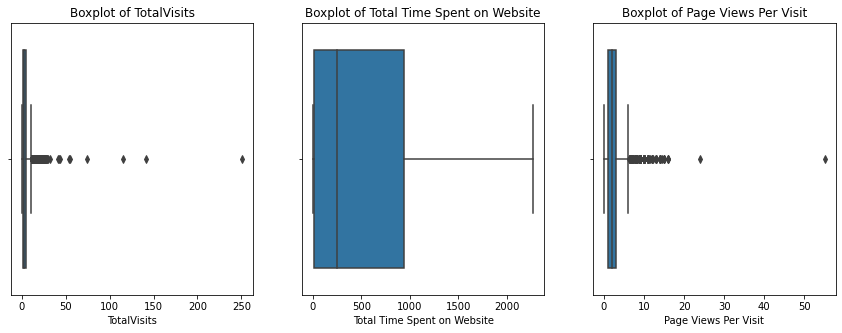

In [89]:
# Checking the outlier and data distribution for Numerical variable
plt.figure(figsize=(20,5))
i= 1

for var in Num_col:
    plt.subplot(1,4,i)
    plt.title("Boxplot of " +var)
    plt.xlabel(var)
    sns.boxplot(lead_df[var])
    i = i+1


Observation : we can see the outlier in TotalVisit and Page Views per visit

In [90]:
# Handling the Outlier using capping method 
for i in Num_col:    
    q1=lead_df[i].describe()["25%"]
    q3=lead_df[i].describe()["75%"]
    iqr=q3-q1 
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    lead_df[i]=np.where(lead_df[i]>upper_bound,upper_bound,lead_df[i])


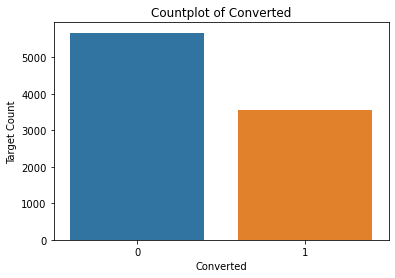

In [91]:
# Checking Target variable "Converted" where 1 indicate lead converted and 0 indicate not converted

sns.countplot(lead_df.Converted)
plt.xlabel("Converted")
plt.ylabel("Target Count")
plt.title("Countplot of Converted")
plt.show()


In [92]:
# Checking the value counts for Converted column
round(lead_df['Converted'].value_counts(normalize = True)*100,2)


0    61.46
1    38.54
Name: Converted, dtype: float64

- we found current lead conversion rate is 38.54 % only


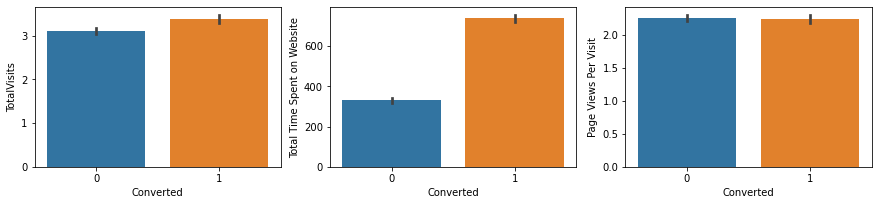

In [93]:
#Checking the Numerical variable with Converted 

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.barplot(y = 'TotalVisits', x ='Converted', data = lead_df)
plt.subplot(3,3,2)
sns.barplot(y = 'Total Time Spent on Website', x ='Converted', data = lead_df)
plt.subplot(3,3,3)
sns.barplot(y = 'Page Views Per Visit', x ='Converted', data = lead_df)
plt.show()


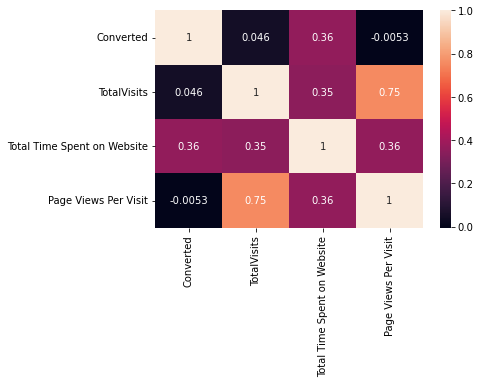

In [35]:
# checking the  correlation for numerical variable 
sns.heatmap(lead_df.corr(), annot=True)
plt.show()


- Inference : Total Time Spent on Website shows the high co relation with Converted than others

### Categorical Variable Analyses with Target variable "Converted"

In [36]:
cat_cols = lead_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Countplot of Lead Origin Vs Converted


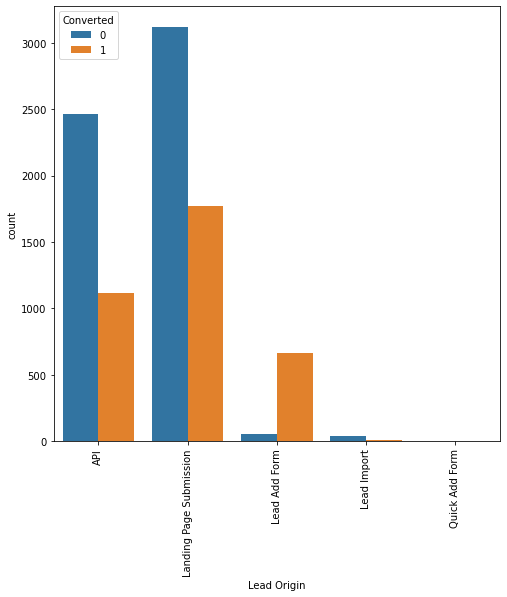

Countplot of Lead Source Vs Converted


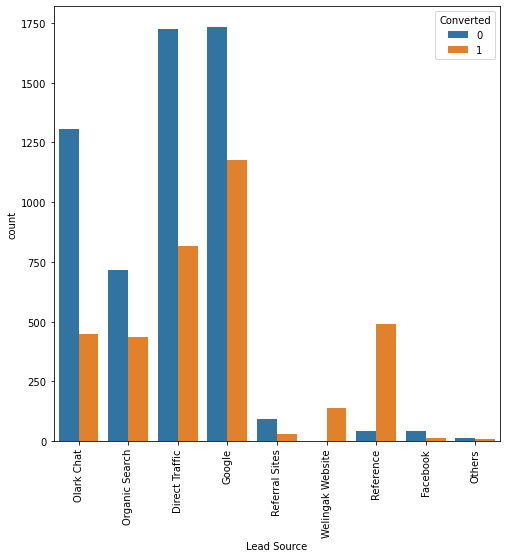

Countplot of Do Not Email Vs Converted


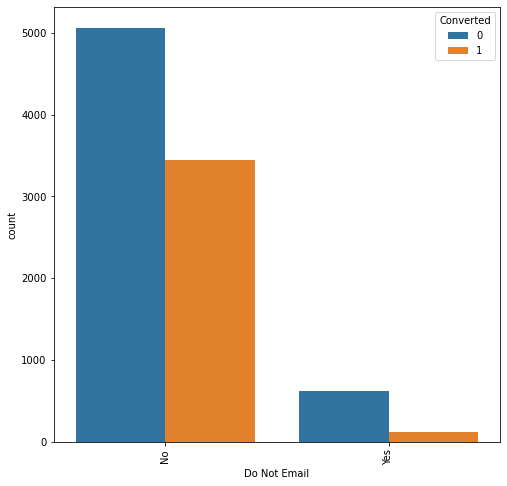

Countplot of Do Not Call Vs Converted


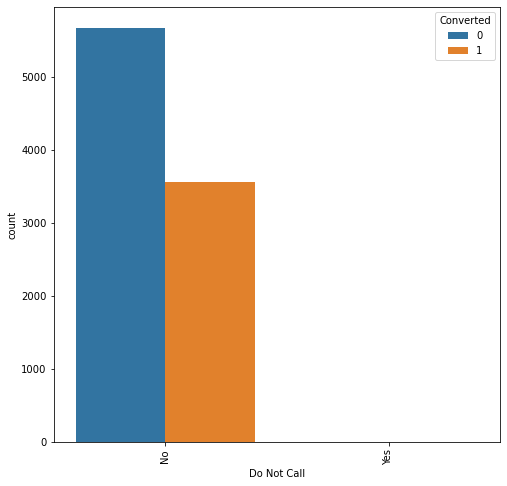

Countplot of Last Activity Vs Converted


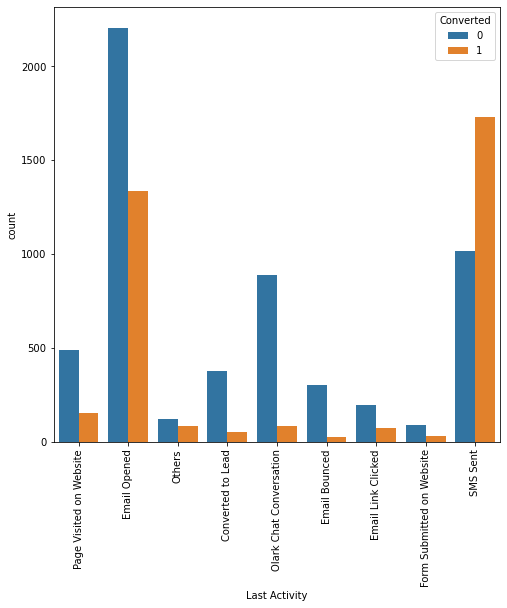

Countplot of Country Vs Converted


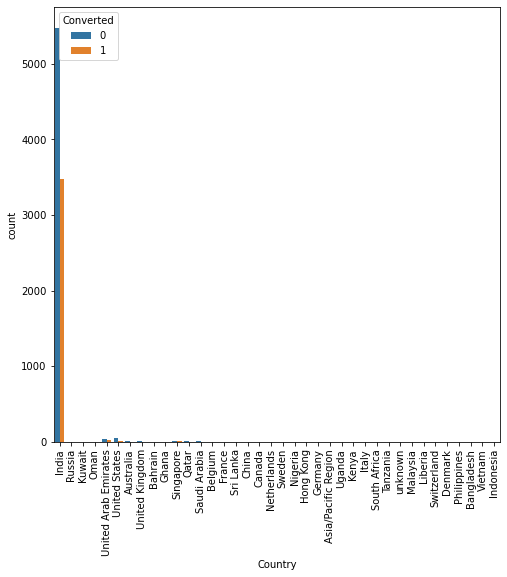

Countplot of Specialization Vs Converted


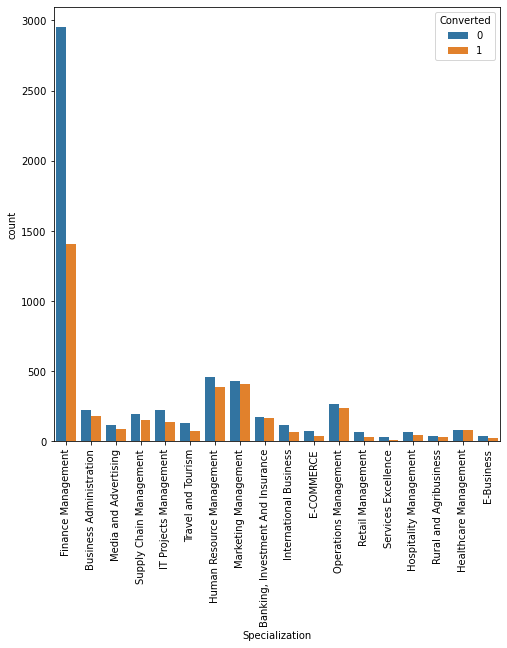

Countplot of What is your current occupation Vs Converted


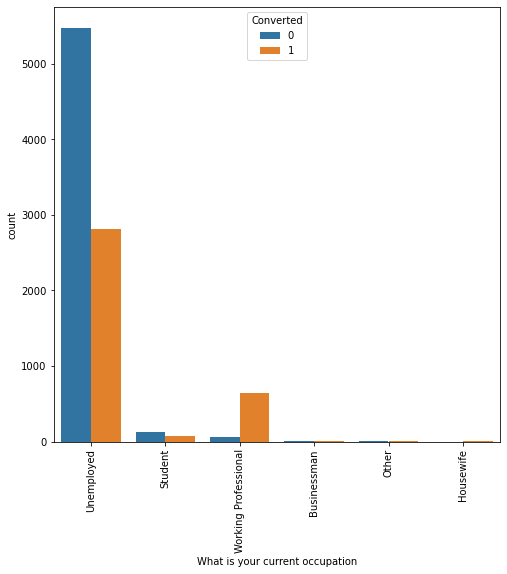

Countplot of What matters most to you in choosing a course Vs Converted


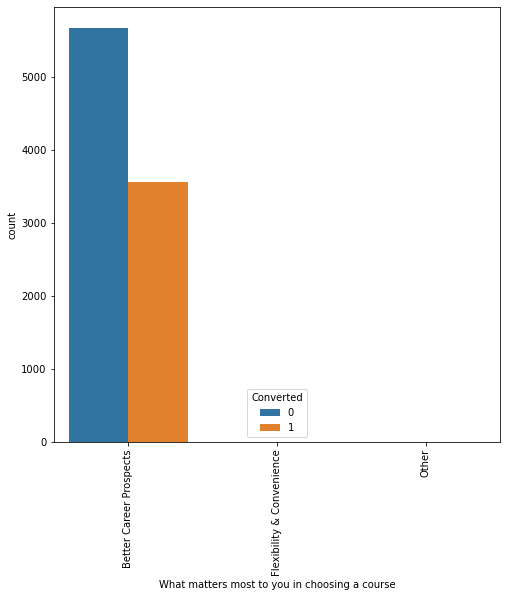

Countplot of Search Vs Converted


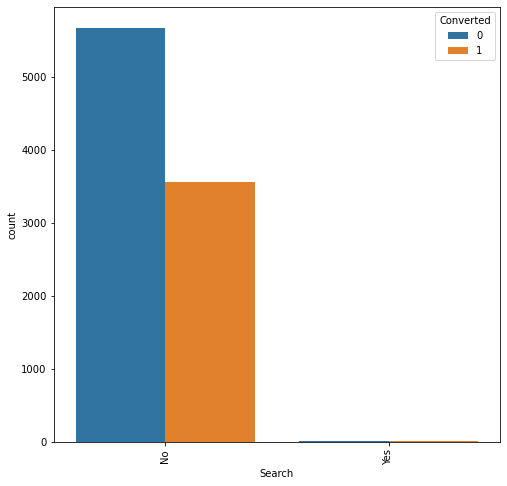

Countplot of Magazine Vs Converted


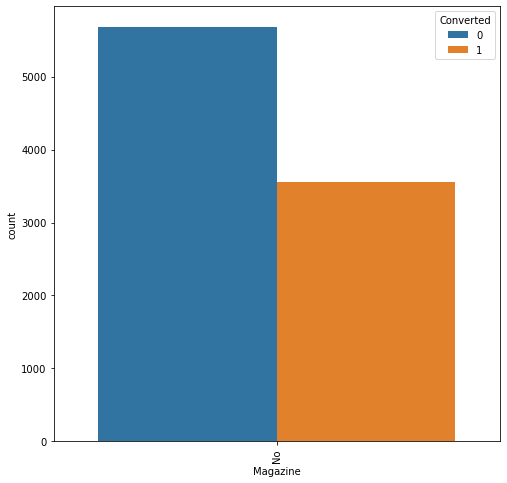

Countplot of Newspaper Article Vs Converted


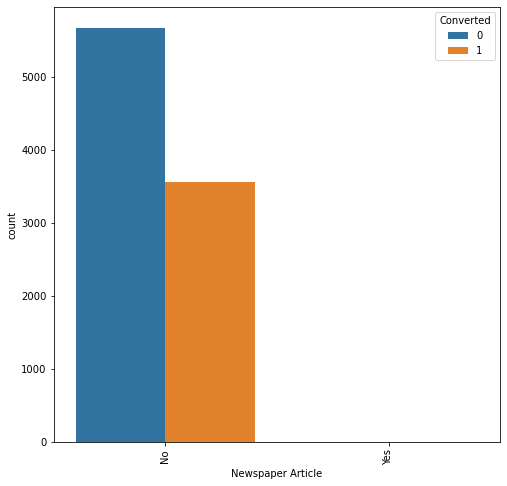

Countplot of X Education Forums Vs Converted


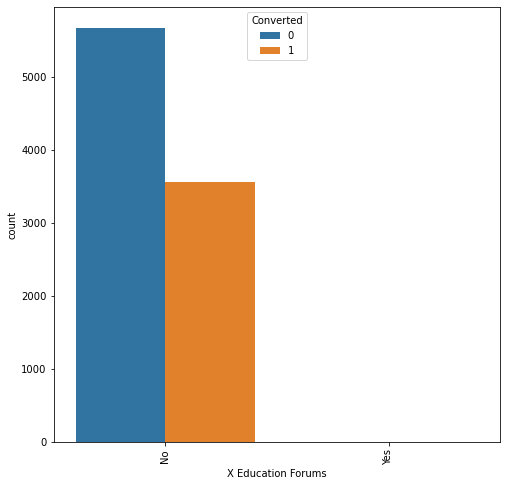

Countplot of Newspaper Vs Converted


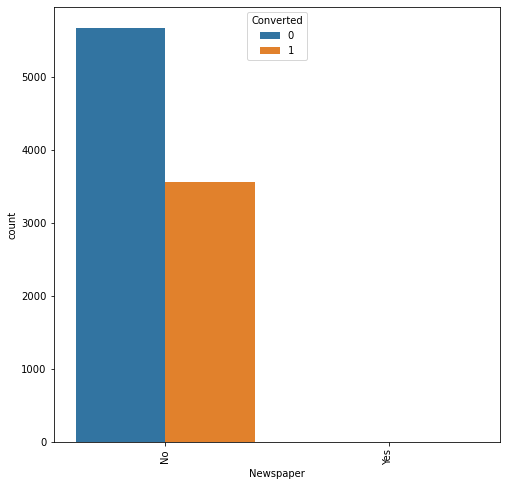

Countplot of Digital Advertisement Vs Converted


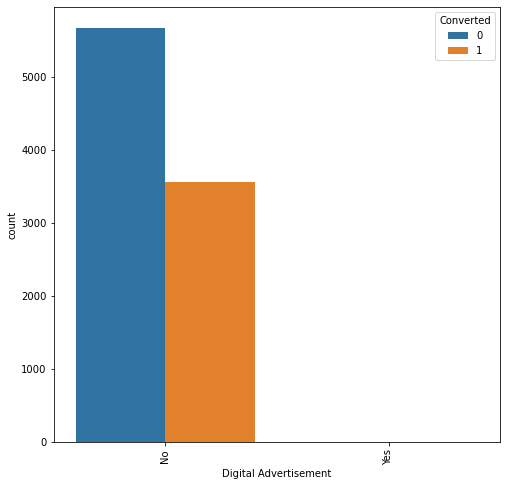

Countplot of Through Recommendations Vs Converted


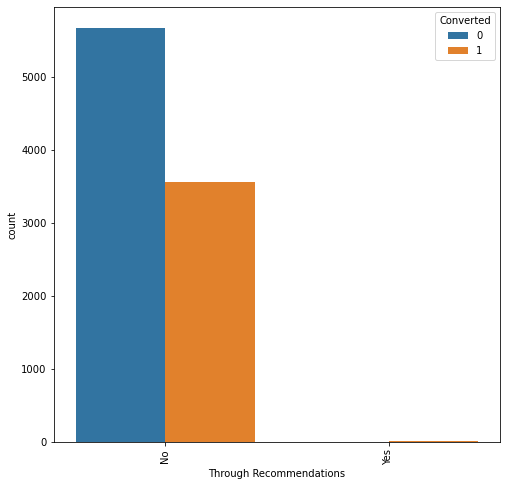

Countplot of Receive More Updates About Our Courses Vs Converted


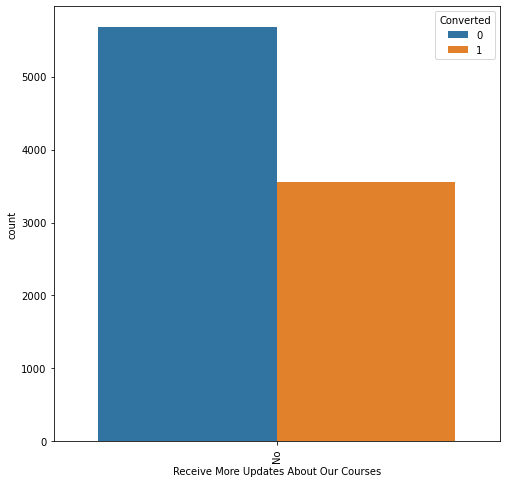

Countplot of Update me on Supply Chain Content Vs Converted


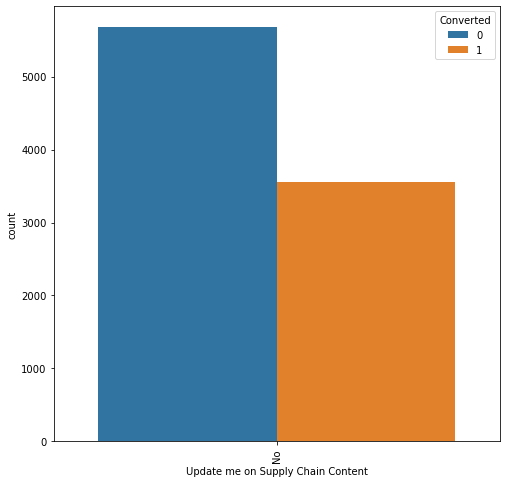

Countplot of Get updates on DM Content Vs Converted


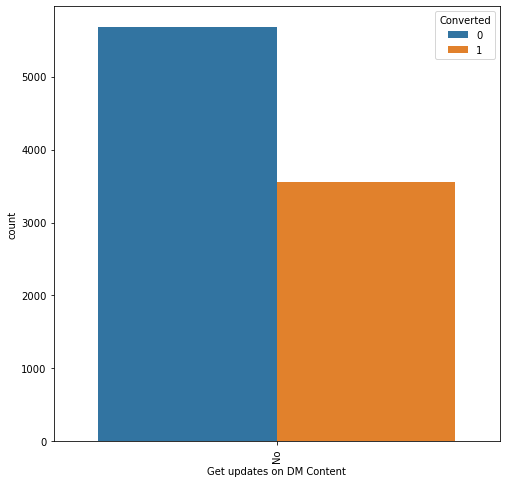

Countplot of I agree to pay the amount through cheque Vs Converted


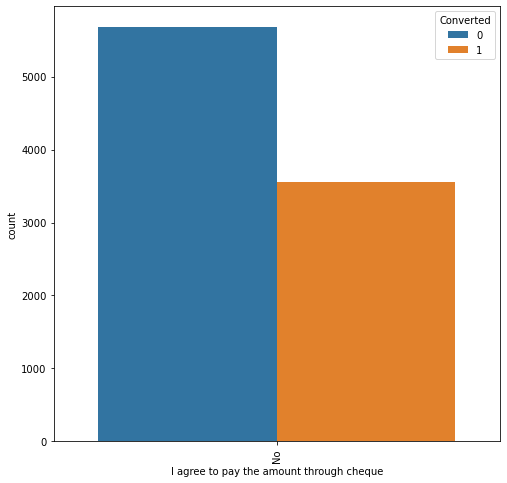

Countplot of A free copy of Mastering The Interview Vs Converted


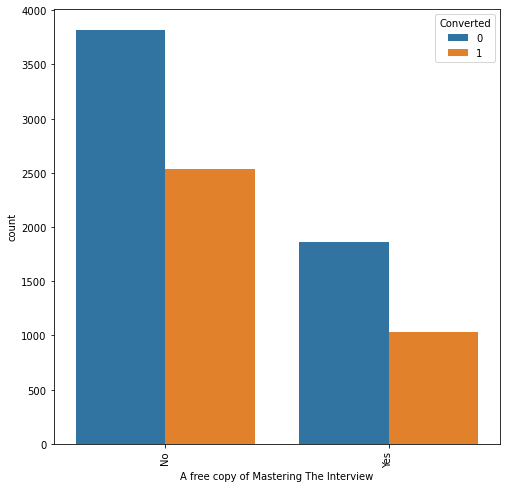

Countplot of Last Notable Activity Vs Converted


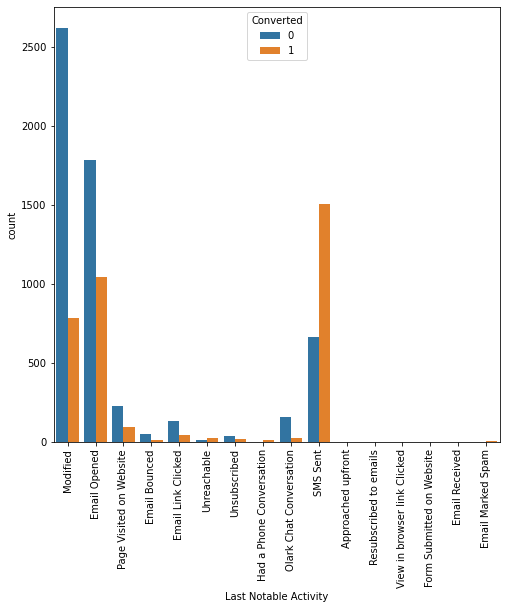

In [37]:
# Visualzing Categorical cols 
for i in cat_cols:
    print("Countplot of",i ,"Vs Converted")
    plt.figure(figsize =(8,8))
    sns.countplot(x = lead_df[i], hue = "Converted", data = lead_df)
    plt.xticks(rotation=90)
    plt.show()


In [95]:
#Droping the imbalance variable which are not contribute any information to our analyses.
#We Droping "Lead Number" since it is unique number for lead  
lead_df = lead_df.drop(["Lead Number","Country","Search","Do Not Call","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","What matters most to you in choosing a course"] , axis =1)


In [96]:
#Checking the the dataset after droping the columns.
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   float64
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

### Data Preparation 

In [97]:
# Converting Binary Variable (Yes/No) to 0/1
Var = ["Do Not Email","A free copy of Mastering The Interview"]

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_df[Var] = lead_df[Var].apply(binary_map)
    

In [98]:
lead_df.head(3)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Finance Management,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Finance Management,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1,Email Opened


In [99]:
# For categorical variables with multiple levels, creating dummy features (one-hot encoded) and droping the first one.
dummy = pd.get_dummies(lead_df[["Lead Origin","Lead Source", "Last Activity","Specialization","What is your current occupation","Last Notable Activity"]], drop_first=True)

# Adding the dummy data to lead_df
lead_df = pd.concat([lead_df, dummy], axis=1)

In [100]:
lead_df.head(3)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Finance Management,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Finance Management,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# As we have created dummies for the below variables, so we are droping repeated variable 
lead_df = lead_df.drop(["Lead Origin","Lead Source", "Last Activity","Specialization","What is your current occupation","Last Notable Activity"],axis =1)


In [102]:
# checking dataset after creating dummy variable and droping the repeated variable 
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Do Not Email                                          9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   float64
 5   Page Views Per Visit                                  9240 non-null   float64
 6   A free copy of Mastering The Interview                9240 non-null   int64  
 7   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9240

# Spliting dataset in to train and test


In [62]:

from sklearn.model_selection import train_test_split

In [103]:
# Defining independent Variables to X
X = lead_df.drop(['Converted','Prospect ID'], axis=1)

# Checking x dataset 

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532.0,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305.0,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428.0,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
# Defining Dependent / response Variable to y
y = lead_df["Converted"]

#Checking y dataset

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [105]:
#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling 

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
# We have used standardscaler to scale the numeric features
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.275215,0.005716,-0.516439,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.624595,-0.691418,0.143543,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.624595,1.365219,1.553761,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 6:Checking the Correlations

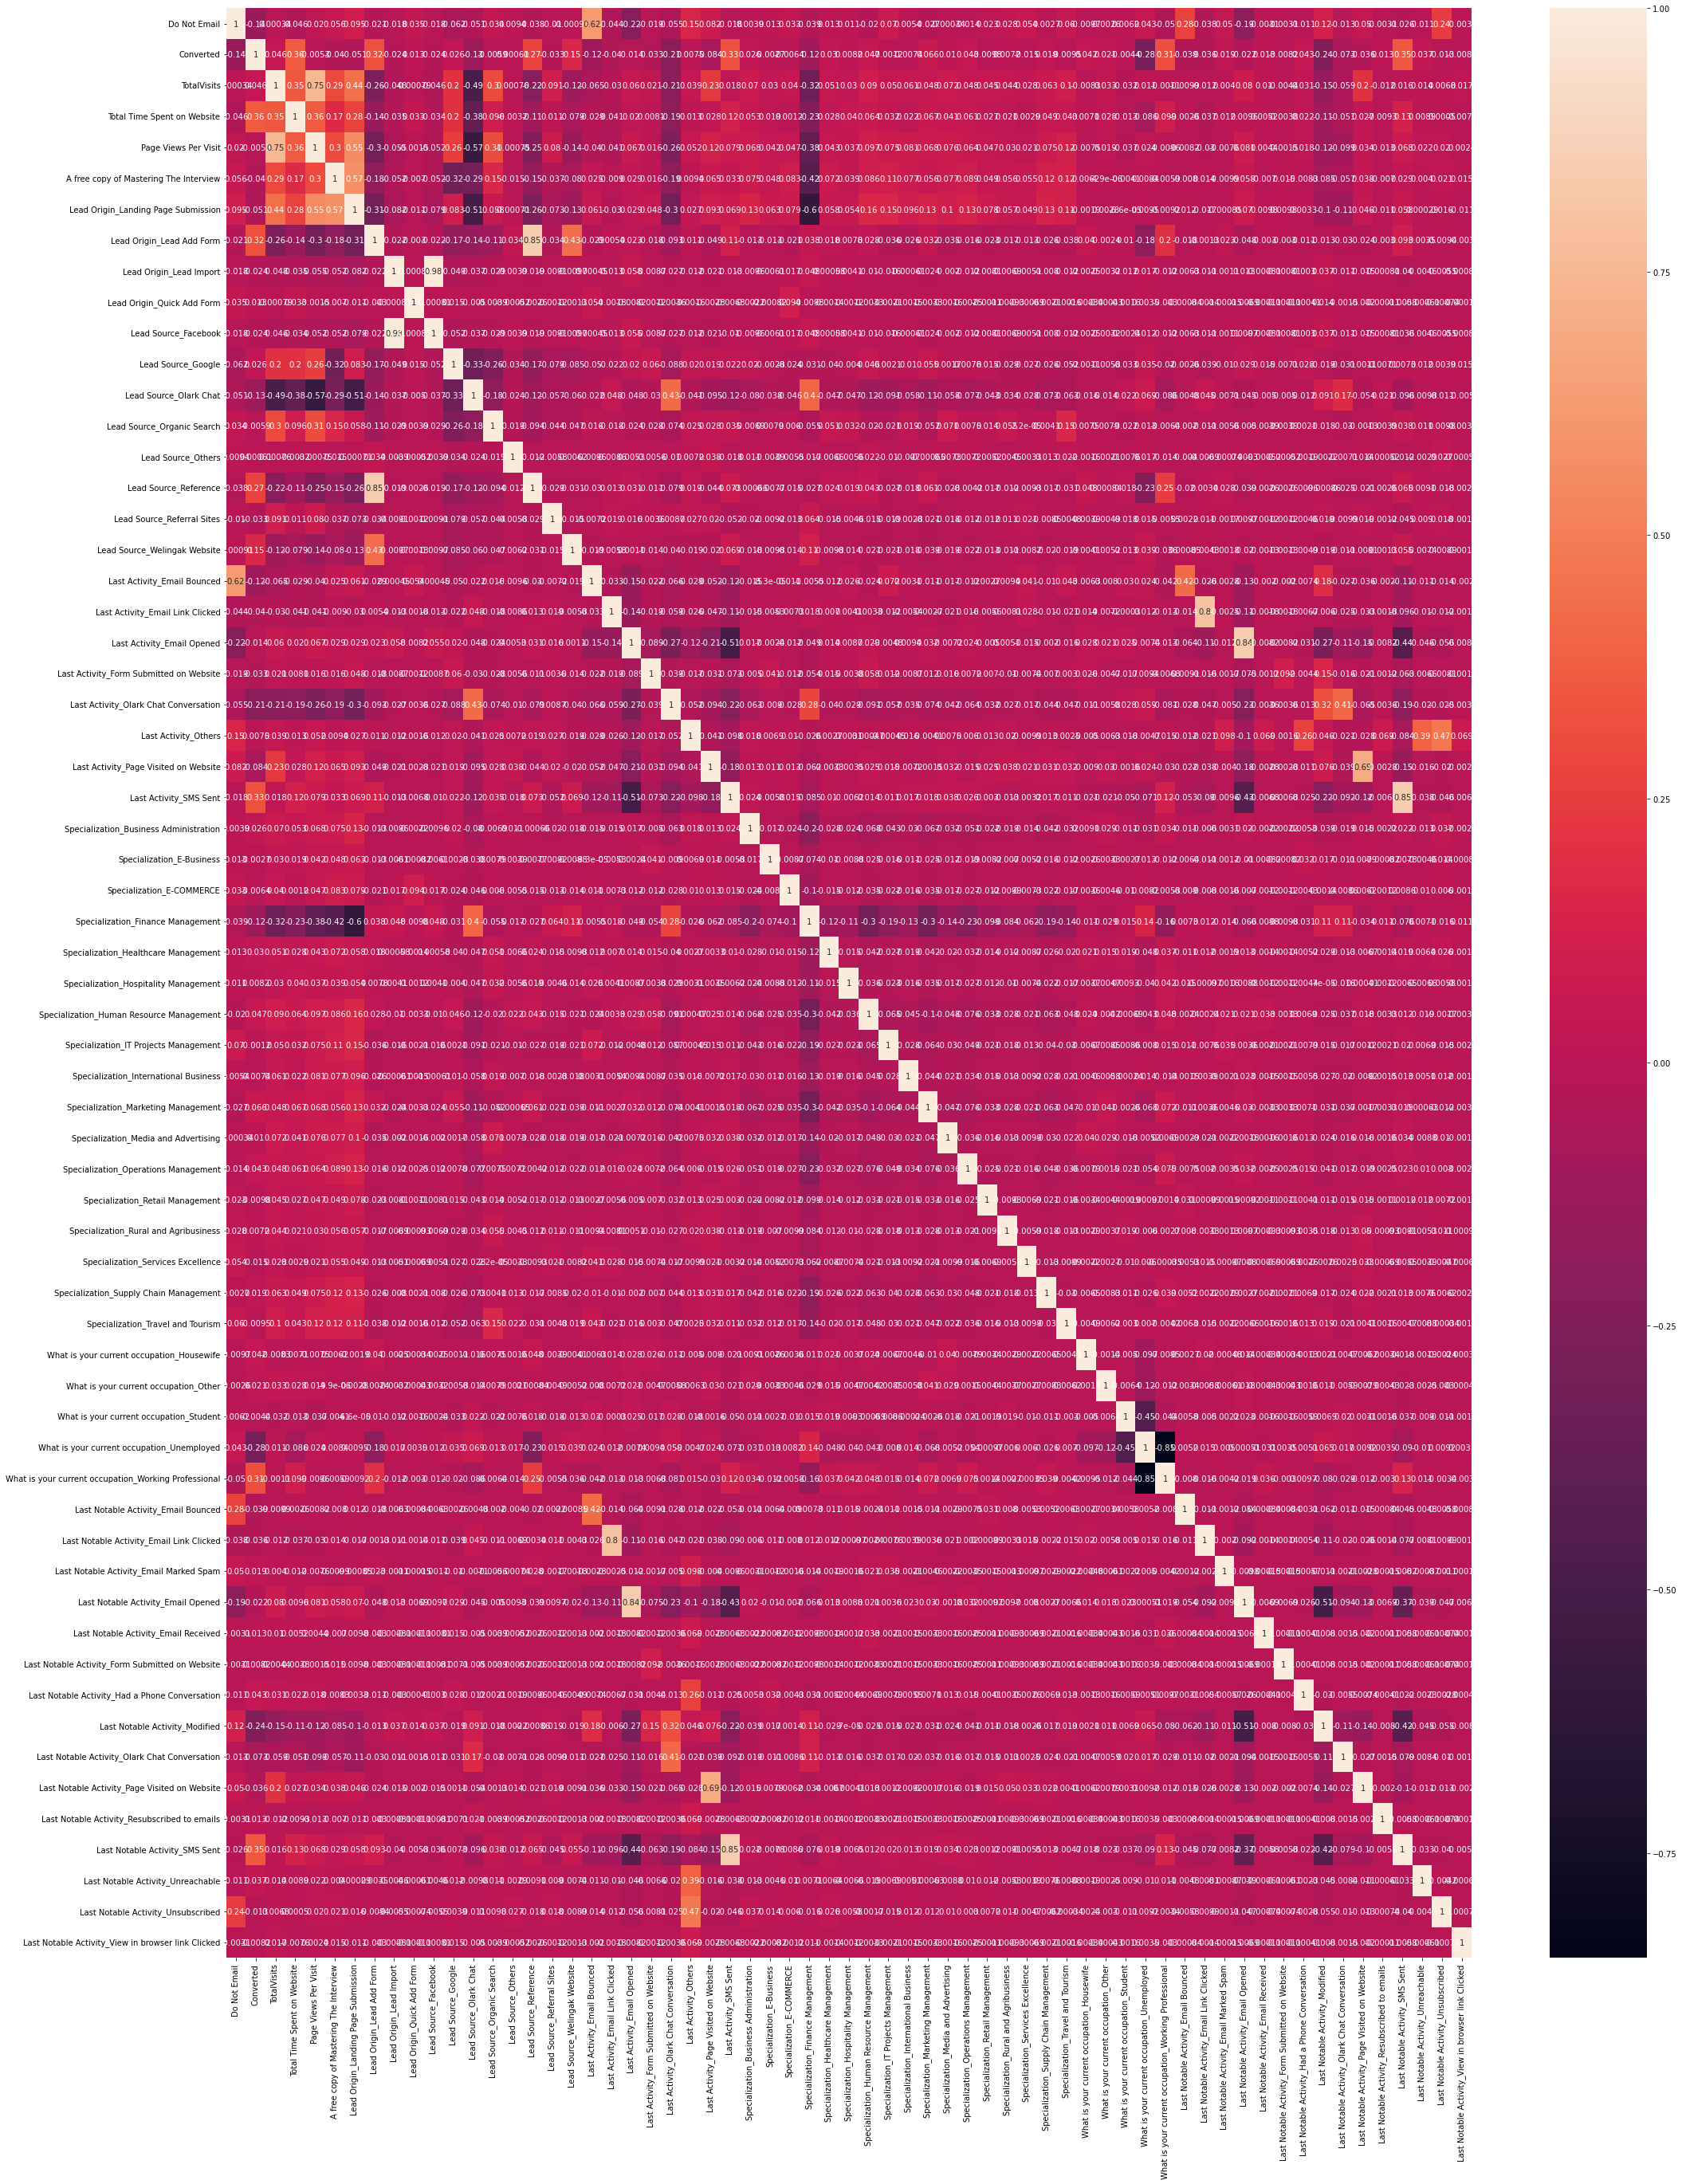

In [110]:
# We checking the correlation 
plt.figure(figsize = (35,45))       
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

In [112]:
#Checking the top 10 correlated variables
lead_df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(10)


Do Not Email                                   Do Not Email                                            1.000000
Lead Origin_Lead Import                        Lead Source_Facebook                                    0.981709
Lead Origin_Lead Add Form                      Lead Source_Reference                                   0.853237
Last Notable Activity_SMS Sent                 Last Activity_SMS Sent                                  0.852707
What is your current occupation_Unemployed     What is your current occupation_Working Professional    0.849653
Last Activity_Email Opened                     Last Notable Activity_Email Opened                      0.842496
Last Notable Activity_Email Link Clicked       Last Activity_Email Link Clicked                        0.800764
TotalVisits                                    Page Views Per Visit                                    0.753953
Last Notable Activity_Page Visited on Website  Last Activity_Page Visited on Website                   0

In [113]:
# Droping the highly correlated dummy variables
X_train = X_train.drop(["Lead Origin_Lead Import","Lead Origin_Lead Add Form","Last Notable Activity_SMS Sent","Last Notable Activity_Email Opened","Last Notable Activity_Email Link Clicked","What is your current occupation_Working Professional"], axis = 1)

X_test = X_test.drop(["Lead Origin_Lead Import","Lead Origin_Lead Add Form","Last Notable Activity_SMS Sent","Last Notable Activity_Email Opened","Last Notable Activity_Email Link Clicked","What is your current occupation_Working Professional"], axis = 1)

### Feature Selection Using RFE


In [116]:
# Using RFE for building Logistic Regression, as it is automated approach.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# selecting 20 output feature  for RFE 

from sklearn.feature_selection import RFE
rfe = RFE(lr,n_features_to_select = 20)
rfe = rfe.fit(X_train,y_train)



In [117]:
#checking the RFE result list for X_train columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('A free copy of Mastering The Interview', False, 19),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 12),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 21),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Bu

In [120]:
# checking the RFE selected variables
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [121]:
# checking the RFE not supported variable 
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization

## Model Building 

In [123]:
# Buidling Model 1 using statsmodel
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.5
Date:                Sat, 25 Feb 2023   Deviance:                       5433.0
Time:                        19:34:32   Pearson chi2:                 6.98e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3870
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5151      0.183      8.293      0.000       1.157       1.873
Do Not Email                                      -1.1948      0.165     -7.242      0.000      -1.518      -0.871
Total Time Spent on Website                        1.0809      0.039     27.751      0.000       1.005       1.157
Lead Source_Olark Chat                             1.1144      0.101     10.998      0.000       0.916       1.313
Lead Source_Others                                 1.3052      0.532      2.453      0.014       0.262       2.348
Lead Source_Reference                              3.7882      0.205     18.464      0.000       3.386       4.190
Lead Source_Welingak Website                       5.6000      0.723      7.745      0.000       4.183       7.017
Last Activity_Olark Chat Conversation             -0.6937      0.194     -3.573      0.000      -1.074      -0.313
Last Activity_Others                               0.6229      0.295      2.109      0.035       0.044       1.202
Last Activity_SMS Sent                             1.2801      0.074     17.385      0.000       1.136       1.424
Specialization_Hospitality Management             -0.8922      0.320     -2.786      0.005      -1.520      -0.265
Specialization_Rural and Agribusiness              0.6289      0.385      1.633      0.102      -0.126       1.384
What is your current occupation_Housewife         20.3676   1.36e+04      0.001      0.999   -2.66e+04    2.66e+04
What is your current occupation_Other             -2.4636      0.809     -3.044      0.002      -4.050      -0.877
What is your current occupation_Student           -2.3581      0.293     -8.046      0.000      -2.933      -1.784
What is your current occupation_Unemployed        -2.7426      0.183    -15.025      0.000      -3.100      -2.385
Last Notable Activity_Had a Phone Conversation     2.8154      1.136      2.478      0.013       0.589       5.042
Last Notable Activity_Modified                    -0.9148      0.082    -11.094      0.000      -1.076      -0.753
Last Notable Activity_Olark Chat Conversation     -0.6390      0.368     -1.735      0.083      -1.361       0.083
Last Notable Activity_Resubscribed to emails      23.0133   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Notable Activity_Unreachable                  0.9817      0.593      1.655      0.098      -0.181       2.144
==================================================================================================================
"""

In [133]:
# Building Model 2 after droping 
cols = ["Do Not Email","Total Time Spent on Website","Lead Source_Olark Chat","Lead Source_Others","Lead Source_Reference","Lead Source_Welingak Website","Last Activity_Olark Chat Conversation","Last Activity_Others","Last Activity_SMS Sent","Specialization_Hospitality Management","Specialization_Rural and Agribusiness","What is your current occupation_Other","What is your current occupation_Student","What is your current occupation_Unemployed","Last Notable Activity_Had a Phone Conversation","Last Notable Activity_Modified","Last Notable Activity_Olark Chat Conversation","Last Notable Activity_Resubscribed to emails","Last Notable Activity_Unreachable"]

X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.7
Date:                Sat, 25 Feb 2023   Deviance:                       5435.4
Time:                        22:03:24   Pearson chi2:                 7.01e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3868
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5477      0.182      8.494      0.000       1.191       1.905
Do Not Email                                      -1.1959      0.165     -7.247      0.000      -1.519      -0.872
Total Time Spent on Website                        1.0805      0.039     27.746      0.000       1.004       1.157
Lead Source_Olark Chat                             1.1132      0.101     10.985      0.000       0.915       1.312
Lead Source_Others                                 1.3049      0.532      2.453      0.014       0.262       2.348
Lead Source_Reference                              3.7882      0.205     18.468      0.000       3.386       4.190
Lead Source_Welingak Website                       5.5993      0.723      7.744      0.000       4.182       7.016
Last Activity_Olark Chat Conversation             -0.6964      0.194     -3.585      0.000      -1.077      -0.316
Last Activity_Others                               0.6200      0.296      2.097      0.036       0.041       1.199
Last Activity_SMS Sent                             1.2787      0.074     17.366      0.000       1.134       1.423
Specialization_Hospitality Management             -0.8952      0.321     -2.793      0.005      -1.523      -0.267
Specialization_Rural and Agribusiness              0.6279      0.385      1.630      0.103      -0.127       1.383
What is your current occupation_Other             -2.4959      0.809     -3.085      0.002      -4.082      -0.910
What is your current occupation_Student           -2.3901      0.293     -8.163      0.000      -2.964      -1.816
What is your current occupation_Unemployed        -2.7745      0.182    -15.234      0.000      -3.131      -2.418
Last Notable Activity_Had a Phone Conversation     2.8173      1.136      2.480      0.013       0.590       5.044
Last Notable Activity_Modified                    -0.9136      0.082    -11.085      0.000      -1.075      -0.752
Last Notable Activity_Olark Chat Conversation     -0.6369      0.368     -1.728      0.084      -1.359       0.085
Last Notable Activity_Resubscribed to emails      21.0164   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_Unreachable                  0.9834      0.593      1.658      0.097      -0.179       2.146
==================================================================================================================
"""

In [134]:
#Building Model 3 after droping "Last Notable Activity_Resubscribed to emails"

cols = ["Do Not Email","Total Time Spent on Website","Lead Source_Olark Chat","Lead Source_Others","Lead Source_Reference","Lead Source_Welingak Website","Last Activity_Olark Chat Conversation","Last Activity_Others","Last Activity_SMS Sent","Specialization_Hospitality Management","Specialization_Rural and Agribusiness","What is your current occupation_Other","What is your current occupation_Student","What is your current occupation_Unemployed","Last Notable Activity_Had a Phone Conversation","Last Notable Activity_Modified","Last Notable Activity_Olark Chat Conversation","Last Notable Activity_Unreachable"]

X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.6
Date:                Sat, 25 Feb 2023   Deviance:                       5437.2
Time:                        22:07:15   Pearson chi2:                 7.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3866
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5470      0.182      8.491      0.000       1.190       1.904
Do Not Email                                      -1.2023      0.165     -7.283      0.000      -1.526      -0.879
Total Time Spent on Website                        1.0805      0.039     27.743      0.000       1.004       1.157
Lead Source_Olark Chat                             1.1172      0.101     11.033      0.000       0.919       1.316
Lead Source_Others                                 1.3030      0.532      2.449      0.014       0.260       2.346
Lead Source_Reference                              3.7884      0.205     18.467      0.000       3.386       4.191
Lead Source_Welingak Website                       5.6009      0.723      7.746      0.000       4.184       7.018
Last Activity_Olark Chat Conversation             -0.6970      0.194     -3.589      0.000      -1.078      -0.316
Last Activity_Others                               0.6714      0.291      2.310      0.021       0.102       1.241
Last Activity_SMS Sent                             1.2788      0.074     17.366      0.000       1.134       1.423
Specialization_Hospitality Management             -0.8961      0.321     -2.795      0.005      -1.524      -0.268
Specialization_Rural and Agribusiness              0.6270      0.385      1.628      0.104      -0.128       1.382
What is your current occupation_Other             -2.4933      0.809     -3.081      0.002      -4.079      -0.907
What is your current occupation_Student           -2.3897      0.293     -8.161      0.000      -2.964      -1.816
What is your current occupation_Unemployed        -2.7737      0.182    -15.230      0.000      -3.131      -2.417
Last Notable Activity_Had a Phone Conversation     2.7657      1.135      2.437      0.015       0.541       4.990
Last Notable Activity_Modified                    -0.9157      0.082    -11.113      0.000      -1.077      -0.754
Last Notable Activity_Olark Chat Conversation     -0.6391      0.368     -1.734      0.083      -1.361       0.083
Last Notable Activity_Unreachable                  0.9316      0.591      1.577      0.115      -0.226       2.090
==================================================================================================================
"""

In [135]:
#Building Model 4 after droping "Last Notable Activity_Unreachable"

cols = ["Do Not Email","Total Time Spent on Website","Lead Source_Olark Chat","Lead Source_Others","Lead Source_Reference","Lead Source_Welingak Website","Last Activity_Olark Chat Conversation","Last Activity_Others","Last Activity_SMS Sent","Specialization_Hospitality Management","Specialization_Rural and Agribusiness","What is your current occupation_Other","What is your current occupation_Student","What is your current occupation_Unemployed","Last Notable Activity_Had a Phone Conversation","Last Notable Activity_Modified","Last Notable Activity_Olark Chat Conversation"]

X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2719.9
Date:                Sat, 25 Feb 2023   Deviance:                       5439.7
Time:                        22:16:14   Pearson chi2:                 7.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3864
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5495      0.182      8.507      0.000       1.192       1.906
Do Not Email                                      -1.2290      0.165     -7.460      0.000      -1.552      -0.906
Total Time Spent on Website                        1.0786      0.039     27.723      0.000       1.002       1.155
Lead Source_Olark Chat                             1.1141      0.101     11.010      0.000       0.916       1.312
Lead Source_Others                                 1.2899      0.532      2.424      0.015       0.247       2.333
Lead Source_Reference                              3.7865      0.205     18.453      0.000       3.384       4.189
Lead Source_Welingak Website                       5.6029      0.723      7.748      0.000       4.186       7.020
Last Activity_Olark Chat Conversation             -0.6897      0.194     -3.552      0.000      -1.070      -0.309
Last Activity_Others                               0.8869      0.250      3.543      0.000       0.396       1.378
Last Activity_SMS Sent                             1.2783      0.074     17.358      0.000       1.134       1.423
Specialization_Hospitality Management             -0.9020      0.321     -2.813      0.005      -1.530      -0.274
Specialization_Rural and Agribusiness              0.6211      0.384      1.615      0.106      -0.133       1.375
What is your current occupation_Other             -2.4863      0.810     -3.071      0.002      -4.073      -0.899
What is your current occupation_Student           -2.3881      0.293     -8.156      0.000      -2.962      -1.814
What is your current occupation_Unemployed        -2.7712      0.182    -15.221      0.000      -3.128      -2.414
Last Notable Activity_Had a Phone Conversation     2.5445      1.125      2.263      0.024       0.340       4.749
Last Notable Activity_Modified                    -0.9261      0.082    -11.271      0.000      -1.087      -0.765
Last Notable Activity_Olark Chat Conversation     -0.6488      0.368     -1.762      0.078      -1.371       0.073
==================================================================================================================
"""

In [136]:
#Building Model 5 after droping "Specialization_Rural and Agribusiness"
cols = ["Do Not Email","Total Time Spent on Website","Lead Source_Olark Chat","Lead Source_Others","Lead Source_Reference","Lead Source_Welingak Website","Last Activity_Olark Chat Conversation","Last Activity_Others","Last Activity_SMS Sent","Specialization_Hospitality Management","What is your current occupation_Other","What is your current occupation_Student","What is your current occupation_Unemployed","Last Notable Activity_Had a Phone Conversation","Last Notable Activity_Modified","Last Notable Activity_Olark Chat Conversation"]

X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2721.1
Date:                Sat, 25 Feb 2023   Deviance:                       5442.3
Time:                        22:19:47   Pearson chi2:                 7.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3861
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5546      0.182      8.541      0.000       1.198       1.911
Do Not Email                                      -1.2251      0.165     -7.442      0.000      -1.548      -0.902
Total Time Spent on Website                        1.0782      0.039     27.723      0.000       1.002       1.154
Lead Source_Olark Chat                             1.1110      0.101     10.987      0.000       0.913       1.309
Lead Source_Others                                 1.2840      0.532      2.414      0.016       0.241       2.327
Lead Source_Reference                              3.7841      0.205     18.448      0.000       3.382       4.186
Lead Source_Welingak Website                       5.5969      0.723      7.740      0.000       4.180       7.014
Last Activity_Olark Chat Conversation             -0.6938      0.194     -3.574      0.000      -1.074      -0.313
Last Activity_Others                               0.8872      0.251      3.541      0.000       0.396       1.378
Last Activity_SMS Sent                             1.2765      0.074     17.343      0.000       1.132       1.421
Specialization_Hospitality Management             -0.9073      0.321     -2.830      0.005      -1.536      -0.279
What is your current occupation_Other             -2.4908      0.810     -3.076      0.002      -4.078      -0.904
What is your current occupation_Student           -2.3648      0.292     -8.100      0.000      -2.937      -1.793
What is your current occupation_Unemployed        -2.7703      0.182    -15.224      0.000      -3.127      -2.414
Last Notable Activity_Had a Phone Conversation     2.5380      1.125      2.257      0.024       0.334       4.742
Last Notable Activity_Modified                    -0.9267      0.082    -11.281      0.000      -1.088      -0.766
Last Notable Activity_Olark Chat Conversation     -0.6490      0.368     -1.762      0.078      -1.371       0.073
==================================================================================================================
"""

In [ ]:
Inference : Droping "Last Notable Activity_Olark Chat Conversation" since showing high P-value

In [138]:
# Bulding Model 6 after droping "Last Notable Activity_Olark Chat Conversation"

cols = ["Do Not Email","Total Time Spent on Website","Lead Source_Olark Chat","Lead Source_Others","Lead Source_Reference","Lead Source_Welingak Website","Last Activity_Olark Chat Conversation","Last Activity_Others","Last Activity_SMS Sent","Specialization_Hospitality Management","What is your current occupation_Other","What is your current occupation_Student","What is your current occupation_Unemployed","Last Notable Activity_Had a Phone Conversation","Last Notable Activity_Modified"]

X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.8
Date:                Sat, 25 Feb 2023   Deviance:                       5445.6
Time:                        22:25:26   Pearson chi2:                 7.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3858
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5491      0.182      8.505      0.000       1.192       1.906
Do Not Email                                      -1.2296      0.164     -7.482      0.000      -1.552      -0.907
Total Time Spent on Website                        1.0746      0.039     27.694      0.000       0.999       1.151
Lead Source_Olark Chat                             1.1085      0.101     10.965      0.000       0.910       1.307
Lead Source_Others                                 1.2949      0.532      2.436      0.015       0.253       2.337
Lead Source_Reference                              3.7735      0.205     18.411      0.000       3.372       4.175
Lead Source_Welingak Website                       5.5888      0.723      7.730      0.000       4.172       7.006
Last Activity_Olark Chat Conversation             -0.8838      0.169     -5.217      0.000      -1.216      -0.552
Last Activity_Others                               0.8794      0.250      3.513      0.000       0.389       1.370
Last Activity_SMS Sent                             1.2779      0.074     17.383      0.000       1.134       1.422
Specialization_Hospitality Management             -0.9034      0.320     -2.821      0.005      -1.531      -0.276
What is your current occupation_Other             -2.4782      0.811     -3.054      0.002      -4.068      -0.888
What is your current occupation_Student           -2.3615      0.292     -8.090      0.000      -2.934      -1.789
What is your current occupation_Unemployed        -2.7727      0.182    -15.226      0.000      -3.130      -2.416
Last Notable Activity_Had a Phone Conversation     2.5521      1.124      2.270      0.023       0.348       4.756
Last Notable Activity_Modified                    -0.8914      0.079    -11.229      0.000      -1.047      -0.736
==================================================================================================================
"""

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# defining vifcalculater function 
def vifcalculater (cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#checking vif for model    
vifcalculater(cols)

                                          Features   VIF
12      What is your current occupation_Unemployed  2.39
14                  Last Notable Activity_Modified  1.82
2                           Lead Source_Olark Chat  1.72
6            Last Activity_Olark Chat Conversation  1.55
8                           Last Activity_SMS Sent  1.48
1                      Total Time Spent on Website  1.21
0                                     Do Not Email  1.15
7                             Last Activity_Others  1.15
4                            Lead Source_Reference  1.10
13  Last Notable Activity_Had a Phone Conversation  1.09
5                     Lead Source_Welingak Website  1.04
11         What is your current occupation_Student  1.03
9            Specialization_Hospitality Management  1.02
3                               Lead Source_Others  1.00
10           What is your current occupation_Other  1.00


- Inference : We can see the VIF is low for all the variable below 5 also with low p value we can consider the Model 6 as final Model with 13 Variables.

In [140]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

1871    0.256044
6795    0.228377
3516    0.297715
8105    0.820736
3934    0.123677
4844    0.992068
3297    0.118369
8071    0.993501
987     0.187860
7423    0.898085
dtype: float64

In [141]:
# Reshaping into an array 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25604421, 0.22837677, 0.29771539, 0.82073615, 0.12367673,
       0.9920681 , 0.11836937, 0.99350114, 0.18785985, 0.8980854 ])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [144]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.256044,1871
1,0,0.228377,6795
2,0,0.297715,3516
3,0,0.820736,8105
4,0,0.123677,3934


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0 ,considering arbitrary cutoff probability point as 0.5

In [145]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.256044,1871,0
1,0,0.228377,6795,0
2,0,0.297715,3516,0
3,0,0.820736,8105,1
4,0,0.123677,3934,0


In [146]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3558  444]
 [ 763 1703]]


In [147]:
# checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8133889919604206


### Metrics beyond simply accuracy

In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6905920519059205

In [151]:
# Calculate specificity for our Logistic regression model
TN / float(TN+FP)

0.889055472263868

In [152]:
# Calculating false postive rate - predicting converted when lead does not have converted
print(FP/ float(TN+FP))

0.11094452773613193


In [153]:
# Calculating positive predictive value 
print (TP / float(TP+FP))

0.7931998136935259


In [154]:
# calculating Negative predictive value
print (TN / float(TN+ FN))

0.8234205045128442


Inference : We got the good Specificity as 0.89 but sensitivity is low 0.69 since the cutoff rate selected arbitrary 0.5 which we need optimise by using ROC curve to get good sensitivity 

###  Plotting the ROC Curve

In [155]:
# defining a function to draw ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

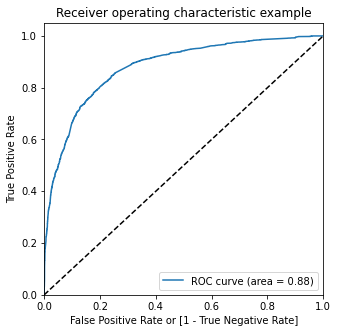

In [157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- We can see the ROC under curve area = 0.88 which indicate the our model is good.

#### Finding Optimal Cutoff Point

In [158]:
# The Optimal cutoff probability point is that where we get balanced sensitivity and specificity.

# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.256044,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.228377,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.297715,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.820736,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.123677,3934,0,1,1,0,0,0,0,0,0,0,0


In [159]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.573129  0.973236  0.326587
0.2   0.2  0.741342  0.909570  0.637681
0.3   0.3  0.793445  0.830089  0.770865
0.4   0.4  0.810606  0.755880  0.844328
0.5   0.5  0.813389  0.690592  0.889055
0.6   0.6  0.794991  0.585564  0.924038
0.7   0.7  0.779066  0.503650  0.948776
0.8   0.8  0.760049  0.416058  0.972014
0.9   0.9  0.711967  0.262774  0.988756


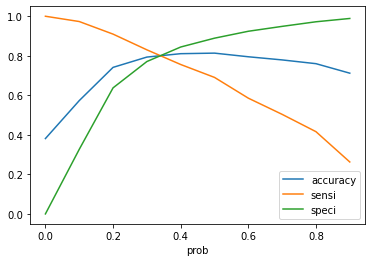

In [160]:
# ploting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

 - Inference : From the above ROC curve we can see 0.35 as optimum point to consider it as cutoff probability 

In [215]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.256044,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.228377,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.297715,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.820736,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.123677,3934,0,1,1,0,0,0,0,0,0,0,0,0


## Calculation Lead Score for Train Dataset

In [217]:

y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.256044,1871,0,1,1,1,0,0,0,0,0,0,0,0,26
1,0,0.228377,6795,0,1,1,1,0,0,0,0,0,0,0,0,23
2,0,0.297715,3516,0,1,1,1,0,0,0,0,0,0,0,0,30
3,0,0.820736,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
4,0,0.123677,3934,0,1,1,0,0,0,0,0,0,0,0,0,12


## Model Evaluation 

In [164]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8042671614100185

In [165]:
# Creating a Confusion metrics
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3257,  745],
       [ 521, 1945]], dtype=int64)

In [166]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [167]:
# Calculating the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7887266828872669

In [168]:
# calculating specificity
TN / float(TN+FP)

0.8138430784607696

In [169]:
# Calculate false postive rate - predicting converted when lead does not have converted
print(FP/ float(TN+FP))

0.18615692153923039


In [170]:
# Calculating Positive predictive value 
print (TP / float(TP+FP))

0.7230483271375465


In [171]:
# Calculating Negative predictive value
print (TN / float(TN+ FN))

0.8620963472736898


### Calculating Precision and Recall

In [176]:
#Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

##### Precision is also known as Positive Predictive Value which indicate percentage of correctly predicted instances relative to total number of cases.

TP / TP + FP

##### Recall is also known as sensitivity which indicate percentage of correctly predicted instances concerning to the total ralative cases.
TP / TP + FN

In [177]:
# calculating Precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7931998136935259

In [178]:
# calculating Recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6905920519059205

#### Precision and recall tradeoff


In [180]:
#importing precision _recall_curve
from sklearn.metrics import precision_recall_curve

In [181]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [182]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

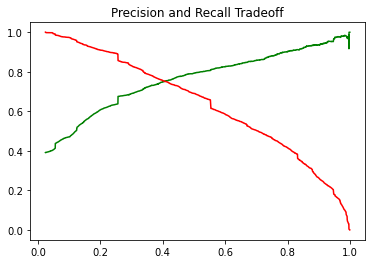

In [184]:
#Plotting Precision and Recall Tradeoff.
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision and Recall Tradeoff")
plt.show()

### Making predictions on the test set


In [185]:
# Scaling X_test numerical variable 

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [187]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified
4269,0,0.964504,0,0,0,0,0,0,1,0,0,0,1,0,0
2376,0,-0.885371,0,0,1,0,0,0,1,0,0,0,1,0,0
7766,0,-0.777416,0,0,0,0,0,1,0,0,0,0,0,0,0
9199,0,-0.885371,1,0,0,0,1,0,0,0,0,0,1,0,1
4359,0,-0.885371,0,0,1,0,0,0,0,0,0,0,1,0,0


In [188]:
# Adding constant to X_test
X_test_sm = sm.add_constant(X_test)

In [191]:
# making prediction on test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

4269    0.748517
2376    0.946659
7766    0.831047
9199    0.055103
4359    0.831791
9186    0.575946
1631    0.454325
8963    0.161362
8007    0.083929
5324    0.358328
dtype: float64

In [193]:
# Converting y_pred to a dataframe which is an array
y_pred1= pd.DataFrame(y_test_pred)

y_pred1.head()

,0
4269,0.748517
2376,0.946659
7766,0.831047
9199,0.055103
4359,0.831791


In [194]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [195]:
# Removing index for both dataframes to append them side by side 
y_pred1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [196]:
# Appending y_test_df and y_pred1
y_pred_final = pd.concat([y_test_df, y_pred1],axis=1)

In [197]:
#Checking the head
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.748517
1,1,2376,0.946659
2,1,7766,0.831047
3,0,9199,0.055103
4,1,4359,0.831791


In [199]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [200]:
# Checking the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.748517
1,2376,1,0.946659
2,7766,1,0.831047
3,9199,0,0.055103
4,4359,1,0.831791


In [209]:
# making the prediction on test 
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.748517,1
1,2376,1,0.946659,1
2,7766,1,0.831047,1
3,9199,0,0.055103,0
4,4359,1,0.831791,1


In [219]:
# Creating Lead Score for Test set 
y_pred_final['Lead Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x * 100))
y_pred_final.head()


,Prospect ID,Converted,Converted_Prob,final_predicted,Lead Score
0,4269,1,0.748517,75,75
1,2376,1,0.946659,95,95
2,7766,1,0.831047,83,83
3,9199,0,0.055103,6,6
4,4359,1,0.831791,83,83


In [210]:
# Calculating Accuracy 
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8152958152958153

In [211]:
#Creating confusion metrics for Test set

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1383,  294],
       [ 218,  877]], dtype=int64)

In [212]:
# defining TP/TN/FP/FN

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [213]:
# Calculating sensitivity of our logistic regression model on test set
TP / float(TP+FN)

0.8009132420091324

In [214]:
# calculate specificity for Test set
TN / float(TN+FP)

0.8246869409660107

In [223]:
#Finding out Hot leads (Lead Score > 90)  to contact 
Hot_leads=y_pred_final.loc[y_pred_final["Lead Score"]>=90]
Hot_leads


,Prospect ID,Converted,Converted_Prob,final_predicted,Lead Score
1,2376,1,0.946659,95,95
13,2907,1,0.908388,91,91
33,8429,1,0.990911,99,99
40,1200,1,0.938129,94,94
49,5638,1,0.960873,96,96
...,...,...,...,...,...
2710,5418,1,0.927928,93,93
2733,5362,1,0.912868,91,91
2734,5741,1,0.903531,90,90
2740,6944,1,0.990695,99,99


In [224]:
# Important variable for final Model 6 

result.params.sort_values(ascending=False)


Lead Source_Welingak Website                      5.588836
Lead Source_Reference                             3.773473
Last Notable Activity_Had a Phone Conversation    2.552070
const                                             1.549072
Lead Source_Others                                1.294941
Last Activity_SMS Sent                            1.277861
Lead Source_Olark Chat                            1.108470
Total Time Spent on Website                       1.074644
Last Activity_Others                              0.879437
Last Activity_Olark Chat Conversation            -0.883814
Last Notable Activity_Modified                   -0.891432
Specialization_Hospitality Management            -0.903375
Do Not Email                                     -1.229556
What is your current occupation_Student          -2.361526
What is your current occupation_Other            -2.478189
What is your current occupation_Unemployed       -2.772715
dtype: float64